# Dynamic Web Scraping

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import time
from tqdm import tqdm

### Initialize web driver

In [4]:
driver = webdriver.Chrome('usr/local/bin/chromedriver')
driver.implicitly_wait(15)
driver.maximize_window()

/var/folders/zn/20g6j7t91810cl_ts2h592y40000gn/T/ipykernel_63520/1216192275.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('usr/local/bin/chromedriver')


In [5]:
url_ee = "https://www.finnomena.com/stock/EE"
driver.get(url_ee)
print(driver.title)

หุ้น EE งบการเงิน 10 ปี พร้อมกราฟ - FINNOMENA


# Scraping Stocks

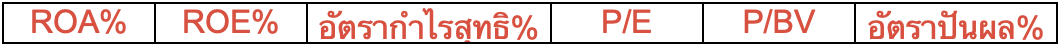

#### Total Quarters

In [6]:
Q_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[1]/div[@class="year"]'
q_elements = driver.find_elements(By.XPATH, Q_XPATH)
# Check the number of elements
print(len(q_elements))
# Convert the elements into list of text
q_list = [element.text for element in q_elements]
print(q_list)

40
['1Q2556', '2Q2556', '3Q2556', '4Q2556', '1Q2557', '2Q2557', '3Q2557', '4Q2557', '1Q2558', '2Q2558', '3Q2558', '4Q2558', '1Q2559', '2Q2559', '3Q2559', '4Q2559', '1Q2560', '2Q2560', '3Q2560', '4Q2560', '1Q2561', '2Q2561', '3Q2561', '4Q2561', '1Q2562', '2Q2562', '3Q2562', '4Q2562', '1Q2563', '2Q2563', '3Q2563', '4Q2563', '1Q2564', '2Q2564', '3Q2564', '4Q2564', '1Q2565', '2Q2565', '3Q2565', '9/2/2566']


In [9]:
table1_index = get_index_table_1("3Q2565")
print(table1_index)
table2_index = get_index_table_2("3Q2565")
print(table2_index)

38
38


#### ROA%

In [10]:
ROA_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[2]/div[@class="data-each"]'
roa_elements = driver.find_elements(By.XPATH, ROA_XPATH)
# Check the number of elements
print(len(roa_elements))
# Convert the elements into list of text
roa_list = [element.text for element in roa_elements]
print(roa_list)
print(roa_list[table1_index])

40
['0.10', '-0.18', '0.21', '0.63', '0.40', '0.00', '0.14', '-0.52', '-0.70', '-0.63', '-2.37', '-3.10', '0.35', '-0.51', '-6.44', '-4.00', '0.57', '0.48', '0.51', '1.84', '2.89', '-1.80', '1.99', '0.83', '1.55', '2.14', '1.15', '1.09', '-1.84', '2.56', '-2.64', '2.25', '0.76', '8.47', '1.79', '0.60', '-0.96', '-1.24', '-0.71', '']
-0.71


#### ROE%

In [12]:
ROE_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[3]/div[@class="data-each"]'
roe_elements = driver.find_elements(By.XPATH, ROE_XPATH)
# Check the number of elements
print(len(roe_elements))
# Convert the elements into list of text
roe_list = [element.text for element in roe_elements]
print(roe_list)
print(roe_list[table1_index])

40
['0.10', '-0.18', '0.21', '0.64', '0.40', '0.00', '0.14', '-0.52', '-0.71', '-0.63', '-2.38', '-3.11', '0.35', '-0.52', '-6.46', '-4.01', '0.58', '0.49', '0.52', '1.87', '2.97', '-1.87', '2.08', '0.89', '1.67', '2.32', '1.25', '1.19', '-2.01', '2.83', '-2.93', '2.50', '0.84', '9.08', '1.88', '0.63', '-0.99', '-1.26', '-0.71', '']
-0.71


#### อัตรากำไรสุทธิ%

In [13]:
PROFIT_RATIO_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[6]/div[@class="data-each"]'
profit_ratio_elements = driver.find_elements(By.XPATH, PROFIT_RATIO_XPATH)
# Check the number of elements
print(len(profit_ratio_elements))
# Convert the elements into list of text
profit_ratio_list = [element.text for element in profit_ratio_elements]
print(profit_ratio_list)
print(profit_ratio_list[table1_index])

40
['16.88', '-29.20', '31.55', '51.17', '44.61', '0.53', '17.50', '-152.18', '-409.44', '-472.75', '-814.71', '-3,898.36', '459.81', '-2,748.56', '-5,128.43', '-7,479.00', '1,169.71', '2,515.53', '280.92', '840.80', '5,281.32', '-1,938.32', '673.38', '130.17', '1,755.74', '6,188.17', '766.84', '1,297.90', '-1,811.00', '5,173.35', '-1,609.30', '7,975.28', '1,120.39', '130.32', '33.93', '-12.42', '-1,427.17', '17,294.16', '-167.44', '']
-167.44


#### P/E

In [14]:
PE_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[4]/div[@class="data-each"]'
pe_elements = driver.find_elements(By.XPATH, PE_XPATH)
# Check the number of elements
print(len(pe_elements))
# Convert the elements into list of text
pe_list = [element.text for element in pe_elements]
print(pe_list)
print(pe_list[table2_index])

40
['55.90', '42.12', '36.42', '33.70', '229.82', '200.16', '174.73', '211.50', '11,970.47', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '41.62', '24.84', '41.32', '24.96', '28.12', '37.52', '16.87', '18.20', '', '32.74', '43.97', 'N/A', '440.25', '63.75', '31.80', '20.87', '', '25.00', '597.68', 'N/A']
597.68


#### P/BV

In [15]:
PBV_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[5]/div[@class="data-each"]'
pbv_elements = driver.find_elements(By.XPATH, PBV_XPATH)
# Check the number of elements
print(len(pbv_elements))
# Convert the elements into list of text
pbv_list = [element.text for element in pbv_elements]
print(pbv_list)
print(pbv_list[table2_index])

40
['2.27', '1.78', '1.46', '1.35', '1.75', '2.12', '2.17', '2.47', '2.25', '2.11', '1.90', '1.88', '1.95', '1.99', '2.00', '2.25', '2.77', '2.52', '2.19', '1.83', '1.41', '1.41', '1.42', '1.23', '1.12', '1.02', '1.13', '1.08', '', '0.95', '1.44', '1.24', '1.51', '2.02', '2.89', '2.70', '', '2.46', '2.13', '2.07']
2.13


#### อัตราปันผล

In [16]:
DIV_YIELD_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[7]/div[@class="data-each"]'
div_yield_elements = driver.find_elements(By.XPATH, DIV_YIELD_XPATH)
# Check the number of elements
print(len(div_yield_elements))
# Convert the elements into list of text
div_yield_list = [element.text for element in div_yield_elements]
print(div_yield_list)
print(div_yield_list[table2_index])

40
['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']
0.00


In [17]:
print(f"Roa : {get_roa(table1_index)}")
print(f"Roe : {get_roe(table1_index)}")
print(f"Profit ratio : {get_profit_ratio(table1_index)}")
print(f"P/E : {get_pe(table2_index)}")
print(f"P/BV : {get_pbv(table2_index)}")
print(f"Divident yield : {get_div_yield(table2_index)}")

Roa : -0.71
Roe : -0.71
Profit ratio : -167.44
P/E : 597.68
P/BV : 2.13
Divident yield : 0.00


In [18]:
def get_index_table_1(Quarter):
    try:
        INDEX_TABLE_1_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[1]/div[@class="year"]'
        index_table_1_elements = driver.find_elements(By.XPATH, INDEX_TABLE_1_XPATH)
        # Convert the elements into list of text
        index_table_1_list = [element.text for element in index_table_1_elements]
        quater_index = index_table_1_list.index(Quarter)
        return quater_index
    except:
        return -1

def get_index_table_2(Quarter):
    try:
        INDEX_TABLE_2_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[1]/div[@class="year"]'
        index_table_2_elements = driver.find_elements(By.XPATH, INDEX_TABLE_2_XPATH)
        # Convert the elements into list of text
        index_table_2_list = [element.text for element in index_table_2_elements]
        quater_index = index_table_2_list.index(Quarter)
        return quater_index
    except:
        return -1

def is_40Quarter():
    try:
        Q_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[1]/div[@class="year"]'
        q_elements = driver.find_elements(By.XPATH, Q_XPATH)
        # Convert the elements into list of text
        q_list = [element.text for element in q_elements]
        # Check if Q3 is in the list
        if len(q_list) == 40:
            return True
        else:
            return False
    except:
        return False

def get_roa(Q_index):
    try:
        ROA_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[2]/div[@class="data-each"]'
        roa_elements = driver.find_elements(By.XPATH, ROA_XPATH)
        # Convert the elements into list of text
        roa_list = [element.text for element in roa_elements]
        roa_value = roa_list[Q_index]
        return roa_value
    except:
        return ""

def get_roe(Q_index):
    try:
        ROE_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[3]/div[@class="data-each"]'
        roe_elements = driver.find_elements(By.XPATH, ROE_XPATH)
        # Convert the elements into list of text
        roe_list = [element.text for element in roe_elements]
        roe_value = roe_list[Q_index]
        return roe_value
    except:
        return ""

def get_profit_ratio(Q_index):
    try:
        PROFIT_RATIO_XPATH = '//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[6]/div[@class="data-each"]'
        profit_ratio_elements = driver.find_elements(By.XPATH, PROFIT_RATIO_XPATH)
        # Convert the elements into list of text
        profit_ratio_list = [element.text for element in profit_ratio_elements]
        profit_ratio_value = profit_ratio_list[Q_index]
        return profit_ratio_value
    except:
        return ""

def get_pe(Q_index):
    try:
        PE_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[4]/div[@class="data-each"]'
        pe_elements = driver.find_elements(By.XPATH, PE_XPATH)
        # Convert the elements into list of text
        pe_list = [element.text for element in pe_elements]
        pe_value = pe_list[Q_index]
        return pe_value
    except:
        return ""

def get_pbv(Q_index):
    try:
        PBV_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[5]/div[@class="data-each"]'
        pbv_elements = driver.find_elements(By.XPATH, PBV_XPATH)
        # Convert the elements into list of text
        pbv_list = [element.text for element in pbv_elements]
        pbv_value = pbv_list[Q_index]
        return pbv_value
    except:
        return ""

def get_div_yield(Q_index):
    try:
        DIV_YIELD_XPATH = '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[7]/div[@class="data-each"]'
        div_yield_elements = driver.find_elements(By.XPATH, DIV_YIELD_XPATH)
        # Convert the elements into list of text
        div_yield_list = [element.text for element in div_yield_elements]
        div_yield_value = div_yield_list[Q_index]
        return div_yield_value
    except:
        return ""


In [19]:
old_stock_path = "/Users/sarmkunatham/Desktop/GithubCodes/WebScraping/finnomena - 2555-2565.csv"
old_stock_df = pd.read_csv(old_stock_path, header=1)
new_stock_df = old_stock_df[["รายชื่อหุ้น", "Line"]]

new_stock_df.head()


,รายชื่อหุ้น,Line
0,EE,https://www.finnomena.com/stock/EE
1,GFPT,https://www.finnomena.com/stock/GFPT
2,LEE,https://www.finnomena.com/stock/LEE
3,MAX,https://www.finnomena.com/stock/MAX
4,NER,https://www.finnomena.com/stock/NER


In [20]:
missing_value_df = pd.DataFrame(columns=["รายชื่อหุ้น", "Line"])
quarter = "3Q2565"
start_row = 0
end_row = 200


for index, row in tqdm(new_stock_df[start_row: end_row].iterrows(), total=new_stock_df[start_row: end_row].shape[0]):
    stock_url = row["Line"]
    # Navigate to the stock page
    driver.get(stock_url)
    
    # Get the index of the quarter from two tables
    table1_index = get_index_table_1(quarter)
    table2_index = get_index_table_2(quarter)

    # Check if Quarter 3 2565 exist
    if not (table1_index == -1 or table2_index == -1):
        roa_value = get_roa(table1_index)
        roe_value = get_roe(table1_index)
        profit_ratio_value = get_profit_ratio(table1_index)
        pe_value = get_pe(table2_index)
        pbv_value = get_pbv(table2_index)
        div_yield_value = get_div_yield(table2_index)

    else:
        
        missing_value_df.loc[index, "รายชื่อหุ้น"] = row["รายชื่อหุ้น"]
        missing_value_df.loc[index, "Line"] = row["Line"]
        missing_value_df.loc[index, "Q32565"] = "No Q3 2565"
        roa_value = ""
        roe_value = ""
        profit_ratio_value = ""
        pe_value = ""
        pbv_value = ""
        div_yield_value = ""
        
    new_stock_df.loc[index, "ROA%"] = roa_value
    new_stock_df.loc[index, "ROE%"] = roe_value
    new_stock_df.loc[index, "อัตรากำไรสุทธิ%"] = profit_ratio_value
    new_stock_df.loc[index, "P/E"] = pe_value
    new_stock_df.loc[index, "P/BV"] = pbv_value
    new_stock_df.loc[index, "อัตราปันผล%"] = div_yield_value


new_stock_df.to_csv(f'Finnomena_Stock_Q3_2565_{start_row}-{end_row}.csv', index=False)
missing_value_df.to_csv(f'MissValue_Finnomena_Q3_2565_{start_row}-{end_row}.csv', index=True)
print('Finish !!!')
print('Missing Value: ', missing_value_df.shape[0])


    

  0%|          | 0/200 [00:00<?, ?it/s]/var/folders/zn/20g6j7t91810cl_ts2h592y40000gn/T/ipykernel_63520/3107099080.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_stock_df.loc[index, "ROA%"] = roa_value
/var/folders/zn/20g6j7t91810cl_ts2h592y40000gn/T/ipykernel_63520/3107099080.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_stock_df.loc[index, "ROE%"] = roe_value
/var/folders/zn/20g6j7t91810cl_ts2h592y40000gn/T/ipykernel_63520/3107099080.py:39: SettingWithCopyWarning: 
A value is trying t

MaxRetryError: HTTPConnectionPool(host='localhost', port=56015): Max retries exceeded with url: /session/3949356c00126f54fb5905658feca983/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x136bf24c0>: Failed to establish a new connection: [Errno 61] Connection refused'))

## Old Method

In [242]:
def get_roa_value():
    try:
        roa_elements = driver.find_elements(By.XPATH,'//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[2]')
        roa_value = roa_elements[0].text.split('\n')[-1]
        return roa_value
    except:
        return ""

def get_roe_value():
    try:
        roe_elements = driver.find_elements(By.XPATH,'//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[3]')
        roe_value = roe_elements[0].text.split('\n')[-1]
        return roe_value
    except:
        return ""
def get_profit_ratio_value():
    try:
        profit_ratio_elements = driver.find_elements(By.XPATH,'//*[@id="stock-financial-ratio"]/div/div/div/div/div[2]/div[2]/div/div[6]')
        profit_ratio_value = profit_ratio_elements[0].text.split('\n')[-1]
        return profit_ratio_value
    except:
        return ""

def get_pe_value():
    try:
        pe_elements = driver.find_elements(By.XPATH, '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[4]')
        pe_element_value = pe_elements[0].text.split('\n')[-2]
        return pe_element_value
    except:
        return ""
def get_pbv_value():
    try:
        pbv_elements = driver.find_elements(By.XPATH, '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[5]')
        pbv_element_value = pbv_elements[0].text.split('\n')[-2]
        return pbv_element_value
    except:
        return ""
def get_div_yield_value():
    try:
        div_yield_elements = driver.find_elements(By.XPATH, '//*[@id="stock-statistics"]/div/div/div/div/div[2]/div[2]/div/div[7]')
        driver_yield_element_value = div_yield_elements[0].text.split('\n')[-2]
        return driver_yield_element_value
    except:
        return ""

In [81]:
new_stock_df[300: 500]

,รายชื่อหุ้น,Line,ROA%,ROE%,อัตรากำไรสุทธิ%,P/E,P/BV,อัตราปันผล%
300,ESTAR,https://www.finnomena.com/stock/ESTAR,0.45,0.61,4.76,78.30,0.37,0.00
301,EVER,https://www.finnomena.com/stock/EVER,-0.63,-1.72,-8.81,N/A,0.47,0.00
302,FPT,https://www.finnomena.com/stock/FPT,0.70,1.93,15.55,20.38,0.99,2.30
303,GLAND,https://www.finnomena.com/stock/GLAND,0.44,0.82,38.14,24.04,0.91,0.00
304,J,https://www.finnomena.com/stock/J,0.42,0.69,13.86,25.23,1.71,0.63
...,...,...,...,...,...,...,...,...
495,WHAUP,https://www.finnomena.com/stock/WHAUP,,,,,,
496,WP,https://www.finnomena.com/stock/WP,,,,,,
497,THL,https://www.finnomena.com/stock/THL,,,,,,
498,B52,https://www.finnomena.com/stock/B52,,,,,,


In [ ]:
# # i = 0
# for index, row in tqdm(new_dataFrame.iterrows()):
#     stock_url = row["Line"]
#     print(f"Index: {index}")
#     driver.get(stock_url)
#     time.sleep(0.5)
#     # Check if Quarter 3 exist
#     if check_Q3_exist():
#         roa_value = get_roa_value()
#         roe_value = get_roe_value()
#         profit_ratio_value = get_profit_ratio_value()
#         pe_value = get_pe_value()
#         pbv_value = get_pbv_value()
#         div_yield_value = get_div_yield_value()
#         if (roa_value == "" or roe_value == "" or profit_ratio_value == "" or pe_value == "" or pbv_value == "" or div_yield_value == ""):
#             missing_dataFrame.loc[index, "รายชื่อหุ้น"] = row["รายชื่อหุ้น"]
#             missing_dataFrame.loc[index, "Line"] = row["Line"]
#     else:
#         missing_dataFrame.loc[index, "รายชื่อหุ้น"] = row["รายชื่อหุ้น"]
#         missing_dataFrame.loc[index, "Line"] = row["Line"]
#         roa_value = ""
#         roe_value = ""
#         profit_ratio_value = ""
#         pe_value = ""
#         pbv_value = ""
#         div_yield_value = ""
#     new_dataFrame.loc[index, "ROA%"] = roa_value
#     new_dataFrame.loc[index, "ROE%"] = roe_value
#     new_dataFrame.loc[index, "อัตรากำไรสุทธิ%"] = profit_ratio_value
#     new_dataFrame.loc[index, "P/E"] = pe_value
#     new_dataFrame.loc[index, "P/BV"] = pbv_value
#     new_dataFrame.loc[index, "อัตราปันผล%"] = div_yield_value
#     # i += 1
#     # if i == 10:
#     #     break

# new_dataFrame.to_csv('New-finnomenaQ32565.csv', index=False)
# missing_dataFrame.to_csv('Missing-finnomenaQ32565.csv', index=False)


    

In [222]:
new_dataFrame

,รายชื่อหุ้น,Line,ROA%,ROE%,อัตรากำไรสุทธิ%,P/E,P/BV,อัตราปันผล%
0,EE,https://www.finnomena.com/stock/EE,-0.71,-0.71,-167.44,597.68,2.13,0.00
1,GFPT,https://www.finnomena.com/stock/GFPT,3.00,4.33,13.33,21.03,1.20,0.68
2,LEE,https://www.finnomena.com/stock/LEE,-0.14,-0.16,-0.51,22.47,0.84,5.33
3,MAX,https://www.finnomena.com/stock/MAX,-0.64,-0.77,-131.81,N/A,0.46,0.00
4,NER,https://www.finnomena.com/stock/NER,3.36,8.79,7.33,5.41,1.76,7.30
...,...,...,...,...,...,...,...,...
849,SICT,https://www.finnomena.com/stock/SICT,2.81,3.66,11.43,33.60,6.50,0.60
850,SIMAT,https://www.finnomena.com/stock/SIMAT,1.27,1.92,10.03,24.52,1.52,0.00
851,SPVI,https://www.finnomena.com/stock/SPVI,3.37,5.92,2.20,17.29,4.70,3.13
852,TPS,https://www.finnomena.com/stock/TPS,3.74,7.06,10.91,22.16,2.82,2.35
